In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## Newton Fractals 

Consider the polynomial 
$$P(z) = z^n - 1.$$ 

The roots $w_k$ of this polynomial are given by the classical $n^{th}$ roots of unity formula:

\begin{align}
w_k = exp\left(\frac{2k\pi i}{n}\right), \quad k = 0, 1, \ldots, n-1.
\end{align}

If we start from a point $z_0$ in the complex plane and apply Newton's method to solve for the root of $P$, we will converge to one of the roots $w_k$. Starting from a different point in the complex plane, we might converge to a different or to the same root as before and so on. 

If we start color coding the complex plane such that each point $z \in \mathbb{C}$ is chosen as the starting point of the Newton iteration to solve for the root of $P$ and then assigned one of the $n$ colors based on which $w_k, k=0, 1, \ldots, n-1$, the Newton method converges to, we will end up partitioning the complex plane in $n$ colors. This partitioning is called the Newton Fractal corresponding to the function $P$. 


Let us define a lambda for a polynomial and it's derivative to be used by the Newton iteration.

In [2]:
n = 4
f = lambda z: np.power(z, n) - 1
fp = lambda z: n * np.power(z, n-1)

The exact roots are given by

In [3]:
roots = np.exp(2*np.pi*1j * np.arange(0, n) / n)

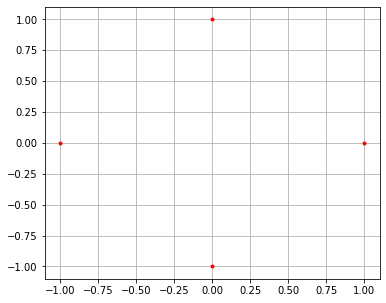

In [4]:
import matplotlib.cm as cm
plt.figure(figsize=(6, 5))
plt.plot(np.real(roots), np.imag(roots), 'r.')#, cmap=cm.gist_rainbow)
plt.grid(True)
plt.show()

The Newton iteration for the roots of $P$ is given by,

In [5]:
Newton = lambda z: z - f(z) / fp(z)

We now define a finite grid to simulate the complex plane 

In [6]:
x = np.linspace(-2, 2, 1001)
y = np.linspace(-2, 2, 1001)
xx, yy = np.meshgrid(x, y)
zz = xx + 1j * yy

We now apply the newton iteration to each point of our finite grid

In [7]:
w = zz
for i in range(50):
    w = Newton(w)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


And we now color code each point of the grid based on to which root $w_k$ the point has converged to. 

In [8]:
p = np.zeros(w.shape)
color_range = np.linspace(0, 255, n)
for (k, r) in enumerate(roots):
    p[np.abs(w - roots[k]) < 1e-3] = color_range[k]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


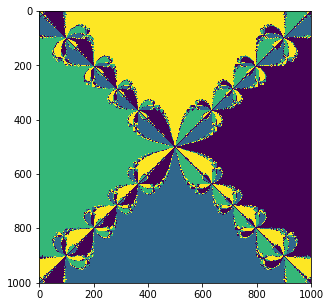

In [9]:
import matplotlib.cm as cm
plt.figure(figsize=(6, 5))
plt.imshow(p, interpolation='nearest')#, cmap=cm.gist_rainbow)
plt.show()